# Feature Engineering for House price prediction problem
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
housetrain=pd.read_csv("/Users/GGS/Desktop/25Nov18/ML/Housepricepredict/train.csv")

In [4]:
housetest=pd.read_csv("/Users/GGS/Desktop/25Nov18/ML/Housepricepredict/test.csv")

In [5]:
housetrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
housetrain.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
housetrain.shape

(1460, 81)

In [8]:
housetrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
house_train_num=housetrain.select_dtypes(include=[np.number])

In [10]:
house_train_cat=housetrain.select_dtypes(include=['object']) 

In [11]:
house_train_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [12]:
for hc in house_train_num.columns:
    print (hc)
    print(house_train_num[hc].mean())
    print(house_train_num[hc].median())
    print ("&&&&&&&&&&&&&&&&&&&&&&&&&&")

Id
730.5
730.5
&&&&&&&&&&&&&&&&&&&&&&&&&&
MSSubClass
56.897260274
50.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
LotFrontage
70.049958368
69.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
LotArea
10516.8280822
9478.5
&&&&&&&&&&&&&&&&&&&&&&&&&&
OverallQual
6.09931506849
6.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
OverallCond
5.57534246575
5.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
YearBuilt
1971.26780822
1973.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
YearRemodAdd
1984.86575342
1994.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
MasVnrArea
103.685261708
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
BsmtFinSF1
443.639726027
383.5
&&&&&&&&&&&&&&&&&&&&&&&&&&
BsmtFinSF2
46.5493150685
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
BsmtUnfSF
567.240410959
477.5
&&&&&&&&&&&&&&&&&&&&&&&&&&
TotalBsmtSF
1057.42945205
991.5
&&&&&&&&&&&&&&&&&&&&&&&&&&
1stFlrSF
1162.62671233
1087.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
2ndFlrSF
346.992465753
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
LowQualFinSF
5.84452054795
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GrLivArea
1515.46369863
1464.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
BsmtFullBath
0.425342465753
0.0
&&&&&&&&&&&

In [13]:
house_train_num_corr=house_train_num.corr()

In [16]:
house_train_num_corr["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [18]:
house_train_num_corr[(house_train_num_corr["SalePrice"]>0.3) ]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
2ndFlrSF,0.005590,0.307886,0.080177,0.050986,0.295493,0.028942,0.010308,0.140024,0.174561,-0.137079,...,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.035164,-0.028700,0.319334
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624


In [19]:
house_train_num_corr[ (house_train_num_corr["SalePrice"]<0.3)]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
BsmtFinSF2,-0.005968,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
LowQualFinSF,-0.044230,0.046474,0.038469,0.004779,-0.030429,0.025494,-0.183784,-0.062419,-0.069071,-0.064503,...,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.028921,-0.025606
BsmtFullBath,0.002289,0.003491,0.100949,0.158155,0.111098,-0.054942,0.187599,0.119470,0.085310,0.649212,...,0.175315,0.067341,-0.049911,-0.000106,0.023148,0.067616,-0.023047,-0.025361,0.067049,0.227122
BsmtHalfBath,-0.020155,-0.002333,-0.007234,0.048046,-0.040150,0.117821,-0.038162,-0.012337,0.026673,0.067418,...,0.040161,-0.025324,-0.008555,0.035114,0.032121,0.020025,-0.007367,0.032873,-0.046524,-0.016844
HalfBath,0.006784,0.177354,0.053532,0.014259,0.273458,-0.060769,0.242656,0.183331,0.201444,0.004262,...,0.108080,0.199740,-0.095317,-0.004972,0.072426,0.022381,0.001290,-0.009050,-0.010269,0.284108


In [22]:
house_train_num_corr[(house_train_num_corr["SalePrice"]>0.3) ].index.values

array(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'], dtype=object)

In [33]:
house_train_num_corr[(house_train_num_corr["SalePrice"]<-0.3) ].index.values

array([], dtype=object)

In [34]:
house_train_num_cols = []
house_train_num_cols.extend(house_train_num_corr[(house_train_num_corr["SalePrice"]>0.3) ].index.values)
house_train_num_cols.extend(house_train_num_corr[(house_train_num_corr["SalePrice"]<-0.3) ].index.values)

In [35]:
house_train_num_cols

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [36]:
h_train_num_col_filtered=house_train_num[house_train_num_cols]

In [39]:
h_train_num_col_filtered

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000
5,85.0,5,1993,1995,0.0,732,796,796,566,1362,1,5,0,1993.0,2,480,40,30,143000
6,75.0,8,2004,2005,186.0,1369,1686,1694,0,1694,2,7,1,2004.0,2,636,255,57,307000
7,NaN,7,1973,1973,240.0,859,1107,1107,983,2090,2,7,2,1973.0,2,484,235,204,200000
8,51.0,7,1931,1950,0.0,0,952,1022,752,1774,2,8,2,1931.0,2,468,90,0,129900
9,50.0,5,1939,1950,0.0,851,991,1077,0,1077,1,5,2,1939.0,1,205,0,4,118000


In [38]:
house_train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [40]:
(house_train_num.isnull().sum().sort_values(ascending=False))

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

In [41]:
for hc in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    print (hc)
    print(house_train_num[hc].mean())
    print(house_train_num[hc].median())
    print ("&&&&&&&&&&&&&&&&&&&&&&&&&&")

LotFrontage
70.049958368
69.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageYrBlt
1978.50616389
1980.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
MasVnrArea
103.685261708
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&


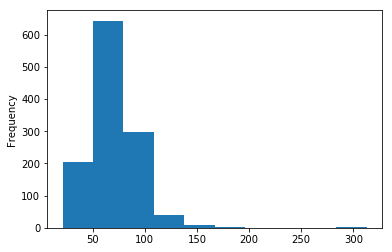

In [42]:
house_train_num["LotFrontage"].plot(kind="hist")

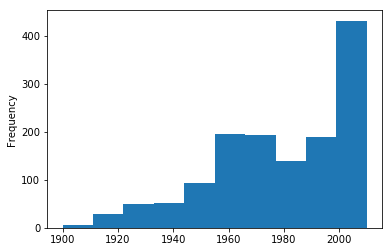

In [43]:
house_train_num["GarageYrBlt"].plot(kind="hist")

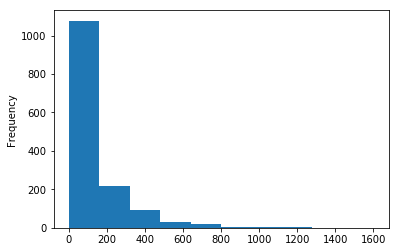

In [44]:
house_train_num["MasVnrArea"].plot(kind="hist")

In [45]:
house_train_num[house_train_num["MasVnrArea"]==0]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,0,0,0,0,0,0,0,2,2008,129500
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,...,140,0,0,0,176,0,0,9,2008,144000
15,16,45,51.0,6120,7,8,1929,2001,0.0,0,...,48,112,0,0,0,0,0,7,2007,132000
17,18,90,72.0,10791,4,5,1967,1967,0.0,0,...,0,0,0,0,0,0,500,10,2006,90000
18,19,20,66.0,13695,5,5,2004,2004,0.0,646,...,0,102,0,0,0,0,0,6,2008,159000


In [47]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    h_train_num_col_filtered[col].fillna(h_train_num_col_filtered[col].median(),inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [50]:
house_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [54]:
(house_train_cat.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [55]:
for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    house_train_cat[col].fillna('No Value',inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [56]:
for col in ["GarageCond","GarageQual","GarageFinish","GarageType","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond","MasVnrType","Electrical"]:
    house_train_cat[col].fillna(house_train_cat[col].value_counts().idxmax(),inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [58]:
house_train_cat1=house_train_cat.apply(le.fit_transform)

In [59]:
house_train_cat1.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,1,8,4


In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
Linreg=LinearRegression()

In [68]:

housetraindf1=pd.concat([h_train_num_col_filtered,house_train_cat1],axis=1)

In [70]:
X1=housetraindf1.drop(["SalePrice"],axis=1)

In [71]:
y=housetraindf1["SalePrice"]

In [72]:
LinRegmodel=Linreg.fit(X1,y)

In [73]:
LinRegmodel.score(X1,y)

0.84244993366085552

In [74]:
import seaborn as sns

In [78]:
import matplotlib.pyplot as plt